Importing Libraries

In [127]:
import numpy as np
import matplotlib.pyplot as plt

###**Q1.Linear Regression**###

Reading data from the dataset and storing it in a numpy array.

In [128]:
linear_data = np.loadtxt("linear.txt",skiprows=1)

**lin_derivative :** This function calculates the derivative of the given loss function wrt w: L(w) = ∑i Li(w) ,where Li(w) = (w(1)*xi + w(2) − yi)^2.The derviative is then stored in a numpy array and returned.

In [129]:
def lin_derivative(w,x,y):
  temp = np.zeros(2)#initalizing a temporary numpy array.
  temp[0] = np.sum(2*x*(w[0]*x + w[1] - y))#derivative wrt w1
  temp[1] = np.sum(2*(w[0]*x + w[1] - y))#derivative wrt w2
  return temp

**linear_regression :** This function is used to find w*(minimizer) of the given loss function using gradient descent.It also prints the minimum value of loss function.

In [130]:
def linear_regression(data,alpha,iterations):
  w = np.random.uniform(-1,1,(2))#initializing a numpy array of size 2 with random numbers b/w -1 and 1.
  x = data[:,0]#obtaining the x-coordinates of all points(features) 
  y = data[:,1]#obtaining the y-coordinates of all points(predictions)
  for i in range(iterations):#iterating through given number of iterations for gradient descent.
    der = lin_derivative(w,x,y)#finding derviative with given parameters.
    w -= alpha * der#changing w accordingly.
  L = np.sum(np.square(w[0]*x + w[1] - y))#calculating loss with the w* found above.
  print("Loss obtained with the given w* is : " + str(L))
  return w 

**plt_linear :** This function is used to plot the esitamted regression line along with the data points in the dataset.

In [131]:
def plt_linear(data,w):
  x1 = np.linspace(-1,1,21)
  plt.scatter(data[:,0],data[:,1],label = "Data points")
  plt.plot(x1,w[0]*x1 + w[1],c = "black",label = "Estimated Regression Line")
  plt.legend()
  plt.show()

Printing the calculated w*

In [132]:
w = np.zeros(2)
w = linear_regression(linear_data,0.01,1000)
print(w)

Loss obtained with the given w* is : 1.9522275746536797
[1.85317013 1.5525919 ]


Plotting the linear regression line.

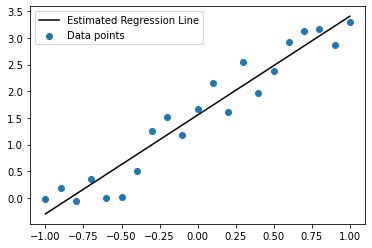

In [133]:
plt_linear(linear_data,w)

###**Q2.Logistic Regression**###

Reading data from the dataset and storing it in a numpy array.

In [134]:
logistic_data = np.loadtxt("logistic.txt",skiprows=1)

**sigmoid :** This function is used to return the sigmoid function 1/1 + e^-z

In [135]:
def sigmoid(arr):
  return 1/(1 + np.exp(-1 * arr))

**log_derivative :** This function calculates the derivative of the given loss function wrt w: L(w) = ∑i Li(w) ,where Li(w) =−logσ(yiwTxi).The derviative is then stored in a numpy array and returned.

In [136]:
def log_derivative(w,x1,x2,y):
  temp = np.zeros(3)
  sig_y = y*sigmoid(-y * (w[0]*x1 + w[1]*x2 + w[2]))#calculating y * sigmoid(ywTx)
  temp[0] = np.sum(sig_y*x1)#derivative wrt w1
  temp[1] = np.sum(sig_y*x2)#derivative wrt w2
  temp[2] = np.sum(sig_y)#derivative wrt w3
  return temp

**logistic_regression :** This function is used to find w*(minimizer) of the given loss function using gradient descent.It also prints the minimum value of loss function.

In [137]:
def logistic_regression(data,alpha,iterations):
  w = np.random.uniform(-1,1,(3))
  x1 = data[:,0]
  x2 = data[:,1]
  y = data[:,2]
  for i in range(iterations):
    der = log_derivative(w,x1,x2,y)
    w += alpha * der
  L = np.sum(-1 * np.log(sigmoid(y * (w[0]*x1 + w[1]*x2 + w[2]))))
  print("Loss obtained with the given w* is : " + str(L))
  return w 

**plt_logistic :** This function is used to plot the esitamted regression line along with the classified data points on a contour plot 

In [138]:
def plt_logistic(data,w):
  #for contour plot
  x1 = np.linspace(-2,3,21)
  x2 = np.linspace(-2,3,21)
  X1,X2 = np.meshgrid(x1,x2)
  plt.contourf(X1,X2,w[0]*X1 + w[1]*X2 + w[2],20)
  plt.colorbar()
  #for line
  plt.plot(x1,-(w[2] + w[0] * x1)/w[1],c = "black")
  #for data points
  plt.scatter(data[:10,0],data[:10,1],marker = "+",label = "+1",c = "red")
  plt.scatter(data[10:,0],data[10:,1],marker = "o",label = "-1",c = "red")
  plt.legend()
  plt.show()

Printing the calculated w*

In [139]:
w = np.zeros(3)
w = logistic_regression(logistic_data,0.5,1000)
print(w)

Loss obtained with the given w* is : 0.0026381858982940307
[ 5.15124705  5.5284778  -5.07516739]


Plotting the logisitic regression line

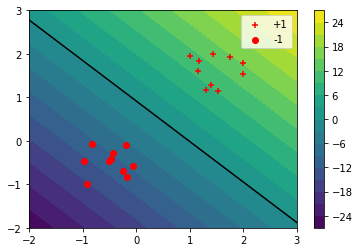

In [140]:
plt_logistic(logistic_data,w)

###**Q3.Regression on MNIST**###

Importing the MNIST dataset using tensorflow.

In [141]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

Plotting point from the dataset.

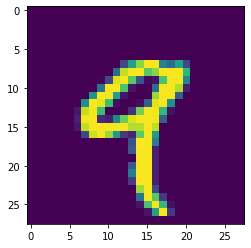

In [142]:
plt.imshow(X_train[4])
plt.show()

**make_arr :** This function is used to make training and testing dataset from the MNIST dataset based on the digits(a,b) to be classified.It returns the "cleaned" training and test sets.

In [143]:
def make_arr(a,b,X_train,Y_train,X_test,Y_test):
  #initilaiztion of lists.
  xtrain_list = []
  xtest_list = []
  ytrain_list = []
  ytest_list = []
  for i in range(X_train.shape[0]):#iterating through each point of the X_train dataset.
    if (Y_train[i] == a or Y_train[i] == b):#if the given digits are found,
      xtrain_list.append(X_train[i].flatten());#appending them to training set.
      if (Y_train[i] == a):#classifying them as +1 if digit is 1
        ytrain_list.append(1)
      else :#else -1 if digit is b
        ytrain_list.append(-1)

  #repeating the same process for test set.
  for i in range(X_test.shape[0]):
    if (Y_test[i] == a or Y_test[i] == b):
      xtest_list.append(X_test[i].flatten());
      if (Y_test[i] == a):
        ytest_list.append(1)
      else :
        ytest_list.append(-1)  

  #converting all the lists into numpy arrays and returning them.
  x_train = np.array(xtrain_list)
  y_train = np.array(ytrain_list)
  x_test = np.array(xtest_list)
  y_test = np.array(ytest_list)
  return x_train,y_train,x_test,y_test

**MNIST_derivative :** Thsi function finds the derivative in the same way as done in the "log_derivative" function.

In [144]:
def MNIST_derivative(w,x_train,y_train):
  n = x_train.shape[1]#for shape of derivative array
  der = np.zeros(n)#initializing derivative array.
  temp = w * x_train#w * x_train gives a matrix in which each column vector represents w(i)x(i).
  temp = temp.sum(axis = 1)#adding all these column vectors and storing the resultant column vector.
  temp = sigmoid(-y_train * temp)#calcuating the sigmoid function(sig(y*w*x)).
  for i in range(n):#upating each element in the derivative array
    der[i] = np.sum(temp * y_train * x_train[:,i])#derivative wrt w(i) is summation(temp * y * x(i))
  return der#returning the derivative array.

**regression :** This function calculates the w* by using gradient descent algorithm.

In [145]:
def regression(x_train,y_train,alpha,iterations):
  w = np.random.uniform(-1,1,x_train.shape[1])#nitializing the w vector
  for i in range(iterations):#running for given number of iterations.
    der = MNIST_derivative(w,x_train,y_train)#finding the derivative.
    w += alpha * der#updating w
  return w#returing the final w*.

**test_acc :** This function calculates the accuracy of with the calculated w* in the previous function on the test set.

In [146]:
def test_acc(w,x_test,y_test):
  correct_pred = 0#variable to store the correct predictions
  for i in range(x_test.shape[0]):#iterating through each row of x_test
    temp = 0
    for j in range(w.shape[0]):#calculating wT*x = w1*x1 + w2*x2 + ....
      temp += w[j] * x_test[i][j]
    if (temp * y_test[i] > 0):#if wT*x * y > 0,classification is correct.
      correct_pred += 1
  total_points = y_test.shape[0]
  accuracy = correct_pred/total_points
  print("Accuracy using the calculated w*: " + str(accuracy))

Getting the cleaned training and testing datasets.

In [147]:
x_train,y_train,x_test,y_test = make_arr(4,7,X_train,Y_train,X_test,Y_test)

Calculating w*.

In [148]:
w = regression(x_train,y_train,0.01,100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Printing the accuaracy.

In [149]:
test_acc(w,x_test,y_test)

Accuracy using the calculated w*: 0.9875621890547264
